Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

In [1]:
import pandas as pd
df = pd.read_csv('C:/users/Stewa/Documents/Downloads/steam-store-games/steam.csv')
df1 = pd.read_csv('C:/users/Stewa/Documents/Downloads/steam-store-games/steamspy_tag_data.csv')

In [2]:
# general data exploration
df.head()
print(df.shape)
print(df1.shape)
df1.head()

(4520, 18)
(29022, 372)


,appid,1980s,1990s,2.5d,2d,2d_fighter,360_video,3d,3d_platformer,3d_vision,...,warhammer_40k,web_publishing,werewolves,western,word_game,world_war_i,world_war_ii,wrestling,zombies,e_sports
0,10,144,564,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
1,20,0,71,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,122,0,0,0
3,40,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,0,77,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()
# instantiate a df_clean so i can have a version to work with, and drop NaNs to start
df_clean = df.dropna()
# check it out now
df_clean.shape
df_clean.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,124534.0,3339.0,17612.0,317.0,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,3318.0,633.0,277.0,62.0,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.0,3416.0,398.0,187.0,34.0,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,1273.0,267.0,258.0,184.0,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.0,5250.0,288.0,624.0,415.0,5000000-10000000,3.99


In [4]:
df_clean.head()
#defining my target/feature base
##########
target = df_clean['price']
features_all = df_clean.drop(['price'], axis=1)
##########

In [5]:
print(features_all.shape, target.shape)
target.describe()

(4519, 17) (4519,)


count    4519.000000
mean        8.210487
std         6.994366
min         0.000000
25%         3.990000
50%         6.990000
75%        10.990000
max        95.990000
Name: price, dtype: float64

In [6]:
'''
This is a regression problem, because my target is numeric, not categorical.
My target is price, that's what I would like t eventually predict, based on the other
features. my next step will be more data exploration, and I need to start looking for
data leaks.
'''

"\nThis is a regression problem, because my target is numeric, not categorical.\nMy target is price, that's what I would like t eventually predict, based on the other\nfeatures. my next step will be more data exploration, and I need to start looking for\ndata leaks.\n"

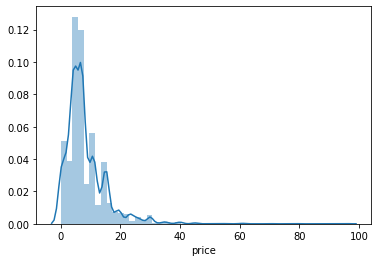

In [9]:
import seaborn as sns
sns.distplot(target);


In [10]:
import numpy as np
target_log = np.log1p(target)

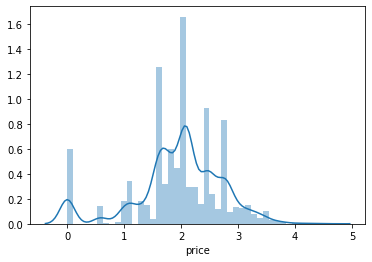

In [11]:
sns.distplot(target_log)

In [ ]:
# I plan on using all observations at first, then paring it down from there
## I'm going to use a time-based split
### Going to have to use some models to figure out feature importance and decide which to exclude